In [20]:
import sqlite3
import pandas as pd
import os

basedir = os.path.abspath('')
con = sqlite3.connect("{}/hawaii.sqlite".format(basedir))
df = pd.read_sql_query("SELECT s.name, m.date, m.prcp FROM measurement as m JOIN station as s ON s.station == m.station WHERE date >= \"2000-0-0\" ORDER BY date desc", con)
df

,name,date,prcp
0,"WAIKIKI 717.2, HI US",2017-08-23,0.00
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2017-08-23,0.00
2,"WAIMANALO EXPERIMENTAL FARM, HI US",2017-08-23,0.08
3,"MANOA LYON ARBO 785.2, HI US",2017-08-23,0.45
4,"WAIKIKI 717.2, HI US",2017-08-22,0.00
...,...,...,...
19545,"UPPER WAHIAWA 874.3, HI US",2010-01-01,0.21
19546,"WAIMANALO EXPERIMENTAL FARM, HI US",2010-01-01,0.15
19547,"WAIHEE 837.5, HI US",2010-01-01,0.15
19548,"HONOLULU OBSERVATORY 702.2, HI US",2010-01-01,0.05


# Ordenar el dataframe por fecha siendo la columna fecha el indice


In [21]:
# set index as index column
df.set_index('date', inplace=True)
# sort data by it's index column (date)
df.sort_values(by=['date'])
#print it
df

,name,prcp
date,,
2017-08-23,"WAIKIKI 717.2, HI US",0.00
2017-08-23,"KUALOA RANCH HEADQUARTERS 886.9, HI US",0.00
2017-08-23,"WAIMANALO EXPERIMENTAL FARM, HI US",0.08
2017-08-23,"MANOA LYON ARBO 785.2, HI US",0.45
2017-08-22,"WAIKIKI 717.2, HI US",0.00
...,...,...
2010-01-01,"UPPER WAHIAWA 874.3, HI US",0.21
2010-01-01,"WAIMANALO EXPERIMENTAL FARM, HI US",0.15
2010-01-01,"WAIHEE 837.5, HI US",0.15


# Grafica del dataframe

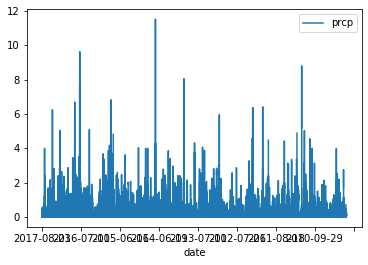

In [22]:
df.plot()

In [23]:
# hawaii dataframe stats summary
df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Query de los ultimos 12 meses de temperaturas observadas


In [31]:
con2 = sqlite3.connect("{}/hawaii.sqlite".format(basedir))
df2 = pd.read_sql_query("SELECT s.name, count(m.tobs) FROM measurement as m JOIN station as s ON s.station == m.station WHERE date >= \"2016-0-0\" GROUP BY s.name ORDER BY 2 desc", con)
df2.set_index('name', inplace=True)
df2

,count(m.tobs)
name,
"WAIKIKI 717.2, HI US",596
"WAIHEE 837.5, HI US",587
"KANEOHE 838.1, HI US",578
"MANOA LYON ARBO 785.2, HI US",563
"WAIMANALO EXPERIMENTAL FARM, HI US",554
"KUALOA RANCH HEADQUARTERS 886.9, HI US",513
"PEARL CITY, HI US",315


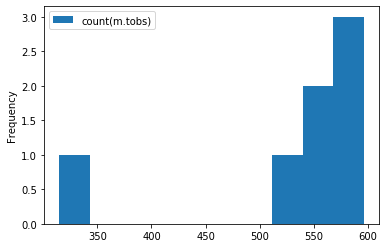

In [32]:
df2.plot.hist()